#Инструкция по выполнению
##Шаг 1. Откройте файлы с данными и объедините их в один датафрейм
Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.
<br>Пути к файлам:
`/datasets/mkrf_movies.csv` — данные о прокатных удостоверениях.
Скачать датасет
`/datasets/mkrf_shows.csv` — данные о прокате в российских кинотеатрах.
Скачать датасет
##Шаг 2. Предобработка данных
1. Проверьте типы данных в датафрейме и преобразуйте там, где это необходимо.
2. Изучите пропуски в датафрейме. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать.
3. Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.
4. Изучите столбцы, которые содержат категориальные значения:
- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле type.
5. Изучите столбцы, которые хранят количественные значения. Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?
6. Добавьте новые столбцы:
- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма;
- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.
##Шаг 3. Проведите исследовательский анализ данных
1. Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов.
Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.
2. Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
3. С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. Сравните значения и сделайте выводы.
4. Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.
##Шаг 4. Исследуйте фильмы, которые получили государственную поддержку
На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.
##Шаг 5. Напишите общий вывод
Оформление
Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Используйте форматирование и заголовки.
Описание данных
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
-`show_start_date` — дата премьеры фильма;
-`type` — тип фильма;
-`film_studio` — студия-производитель;
-`production_country` — страна-производитель;
-`director` — режиссёр;
-`producer` — продюсер;
-`age_restriction` — возрастная категория;
-`refundable_support` — объём возвратных средств государственной поддержки;
-`nonrefundable_support` — объём невозвратных средств государственной поддержки;
-`financing_source` — источник государственного финансирования;
-`budget` — общий бюджет фильма;
-`ratings` — рейтинг фильма на КиноПоиске;
-`genres` — жанр фильма.
<br>Обратите внимание, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.
<br>Таблица `mkrf_show`s содержит сведения о показах фильмов в российских кинотеатрах.
-`puNumber` — номер прокатного удостоверения;
-`box_office` — сборы в рублях.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings('ignore')

##**Шаг 1. Откройте файлы с данными и объедините их в один датафрейм**
**Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.**

In [4]:
url = 'https://drive.google.com/file/d/19XPkhbAN4dFRj6_PMhqLEKU1DA5uxJgH/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
movies = pd.read_csv(path)
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
url = 'https://drive.google.com/file/d/1w9K0bK7ZmVGdqG8WEORrcMr_811Ty0ZU/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
shows = pd.read_csv(path)
shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [7]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В датафрейме `movies` в колонке `puNumbers`, есть одно значение `нет`. Ниже приведена строка с этим значением. Почти вся строка с пропусками, поэтому удалим ее из датасета после этого преобразуем колонку `puNumbers` в тип `int`, так для таблицы `shows` данная колонка имеет тип `int`, а для соединения таблиц по общей колонке типы колонки, так же должны совпадать.

In [8]:

movies = movies.loc[movies['puNumber']!='нет']
movies['puNumber'] = movies['puNumber'].astype('int')
movies['puNumber'].dtypes

dtype('int64')

In [9]:
df = movies.merge(shows, on='puNumber', how='left')

##**Шаг 2. Предобработка данных**

**2.1 Проверьте типы данных в датафрейме и преобразуйте там, где это необходимо.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Столбец `show_start_date(дата премьеры фильма)` нужно преобразовать в тип `datetime`, чтобы можно было полноценно работать с датой.
Стоблец `ratings` требуется преобразовать в тип `float`, так как он содержит цифровую оценку.

In [11]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [12]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Столбец `ratings` содержит оценку фильма по 10-ти бальной системе, однако встречаются и значения указанные в процентах. Преобразуем процентные оценки в цифровые, а так же пропущенные значения заполним "нулями", но для себя отметим, что значение ноль - это отсутсвие оценки. Для этого напишем функцию и применим ее к столбцу.

In [13]:
def rating(s):
  if '%' in str(s):
    s = s[:-1]
    s = float(s)
    s = s/10
    return round(s,1)
  if pd.isna(float(str(s))):
    return 0
  return float(s)


In [14]:
for i in ['89%', '8.9', 1.1, float('nan')]:
  print(rating(i))

8.9
8.9
1.1
0


In [15]:
df['ratings'] = df['ratings'].apply(rating)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

**2.2 Изучите пропуски в датафрейме. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать.**

In [17]:
a = df.isna().sum()
a.name= 'Прощенные значения'
a.loc[a!=0]

,Прощенные значения
film_studio,18
production_country,2
director,9
producer,568
refundable_support,7153
nonrefundable_support,7153
budget,7153
financing_source,7153
genres,975
box_office,4327


Для столбцов `film_studio`, `production_country`, `director`, `producer`, `genres` заполним пропуски значением `не указано`.
Для столбцов `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `box_office` пропущенные значения заполним нулями, а для себя отметим, что 0 это пропуск.

In [18]:
lst = ['film_studio', 'production_country', 'director', 'producer', 'genres']
for column in lst:
  df[column] = df[column].fillna('не указано')
lst =  ['refundable_support', 'nonrefundable_support', 'budget', 'financing_source', 'box_office']
for column in lst:
  df[column] = df[column].fillna(0)

In [19]:
df.isna().sum()

,0
title,0
puNumber,0
show_start_date,0
type,0
film_studio,0
production_country,0
director,0
producer,0
age_restriction,0
refundable_support,0


**2.3. Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.**

In [20]:
df.duplicated().sum()

0

Дублированных строк в датасете нет.

**2.4. Изучите столбцы, которые содержат категориальные значения:**
- **Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;**
- **Исправьте проблемные значения в поле type.**

In [21]:
lst = ['type', 'age_restriction', 'genres']
for column in lst:
  print(df[column].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории']
['боевик,драма,мелодрама' 'драма,военный' 'фантастика,боевик,триллер'
 'драма' 'мелодрама,комедия' 'мюзикл,мелодрама,комедия' 'комедия,криминал'
 'боевик,триллер,детектив' 'боевик,драма,приключения' 'драма,спорт'
 'триллер,драма,мелодрама' 'комедия,мелодрама' 'драма,мелодрама,комедия'
 'драма,мелодрама' 'драма,история' 'драма,мелодрама,семейный'
 'комедия,мелодрама,криминал' 'комедия' 'боевик,драма,криминал'
 'драма,комедия' 'ужасы,фантастика,комедия'
 'мультфильм,короткометражка,мелодрама' 'драма,криминал'
 'мультфильм,фантастика,фэнтези' 'триллер,драма,криминал'
 'драма,мелодрама,биография' 'драма,комедия,военный'
 'фантастика,драма,детектив' 'мюзикл,семейный' 'не указа

Во всех категориальных стобцах довольно объемное описание категорий. Для более удобного анализа лучше использовать словари, в которых оставлять только цифровой номер категории.

In [22]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В столбце `type` есть повторяющиеся категории записанные по разному это 'Художественный' и ' Художественный' (различие в пробеле спереди).

In [23]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**2.5. Изучите столбцы, которые хранят количественные значения. Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?**

In [24]:
lst = ['refundable_support', 'nonrefundable_support', 'budget']
df[lst].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   refundable_support     7485 non-null   float64
 1   nonrefundable_support  7485 non-null   float64
 2   budget                 7485 non-null   float64
dtypes: float64(3)
memory usage: 175.6 KB


Пропущенные значение в вышеуказанных столбцах ранее были заменены нулями.

**2.6. Добавьте новые столбцы:**
- **Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма;**
- **Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;**
- **Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.**

In [25]:
df['year'] = df['show_start_date'].dt.year
sorted(df['year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [26]:
def keep_first(s):
  return s.split(',')[0]

df['director_one'] = df['director'].apply(keep_first)
df['genre'] = df['genres'].apply(keep_first)
df[['director', 'director_one', 'genres', 'genre']].sample(10, random_state=43)

,director,director_one,genres,genre
1645,В.Шамиров,В.Шамиров,комедия,комедия
4004,Р.Салахутдинов,Р.Салахутдинов,"драма,криминал",драма
3442,Питер Челсом,Питер Челсом,"фантастика,драма,мелодрама",фантастика
3802,В.Воробьев,В.Воробьев,военный,военный
3712,Тимур Бекмамбетов,Тимур Бекмамбетов,"боевик,драма,приключения",боевик
7329,В.Чигинский,В.Чигинский,"биография,спорт,драма",биография
3020,Александр Сокуров,Александр Сокуров,"драма,история",драма
808,Джулия Локтев,Джулия Локтев,триллер,триллер
2459,"В.Пономарёв, А.Миронов, Е.Салабай, И.Пшонкин",В.Пономарёв,не указано,не указано
3741,"Кайл Балда, Эрик Гуильон, Пьер Коффан",Кайл Балда,"мультфильм,фантастика,фэнтези",мультфильм


Сосдадим столбец `share`, в котором рассчитаем долю государственной поддержки. Если в столбце `budget` был 0 (так мы заполнили пропуски), то в столбце `share` так же оставим ноль. Реализуем функцию и создадим столбец.

In [27]:
def share(row):
  ref = row['refundable_support']
  nonref = row['nonrefundable_support']
  budget = row['budget']
  if budget==0:
    return 0
  else:
    return (ref+nonref)/budget

df['share'] = df.apply(share, axis=1)

In [28]:
df.loc[df['share']!=0][['budget', 'refundable_support', 'nonrefundable_support', 'share']].head(10)

,budget,refundable_support,nonrefundable_support,share
1281,79411900.0,0.0,26500000.0,0.333703
1448,37142857.0,0.0,26000000.0,0.700000
1498,176023490.0,0.0,107847945.0,0.612691
1524,40574140.0,0.0,28000000.0,0.690095
1792,40015122.0,0.0,25000000.0,0.624764
1853,51850000.0,0.0,25000000.0,0.482160
1869,220588394.0,50000000.0,100000000.0,0.680000
1870,86210067.0,0.0,46502299.0,0.539407
1902,139551503.0,0.0,75000000.0,0.537436
1911,48571430.0,0.0,34000000.0,0.700000


##**Шаг 3. Проведите исследовательский анализ данных**
**3.1. Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов.
Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.**

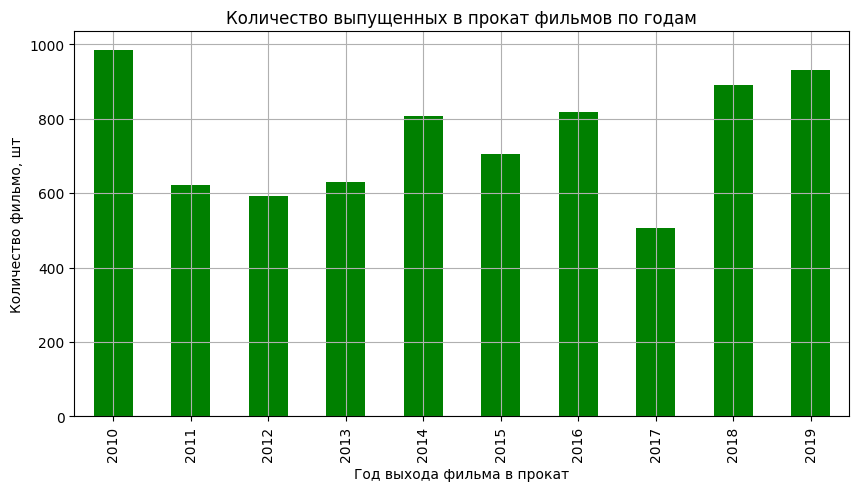

In [29]:
df.groupby('year')['title'].count().plot(kind='bar',
                                         color='g',
                                         figsize=(10,5),
                                         grid=True)
plt.xlabel('Год выхода фильма в прокат')
plt.ylabel('Количество фильмо, шт')
plt.title('Количество выпущенных в прокат фильмов по годам')
plt.show()

In [30]:
d1 = df.groupby('year')['title'].count()
d1.name = 'total'
d1

,total
year,
2010,985
2011,622
2012,593
2013,630
2014,806
2015,705
2016,818
2017,505
2018,891


In [31]:
d2 = df.loc[df['box_office']!=0].groupby('year')['title'].count()
d2.name = 'box_office'
d2

,box_office
year,
2010,101
2011,109
2012,123
2013,179
2014,273
2015,462
2016,525
2017,357
2018,475


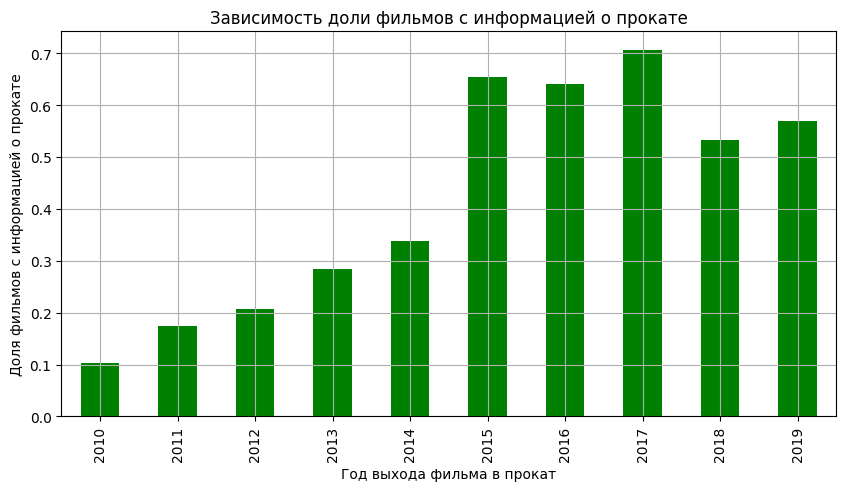

In [32]:
d3 = pd.DataFrame(data = {d1.name:d1, d2.name:d2}, index=d1.index)
d3['share'] = d3['box_office']/ d3['total']
d3['share'].plot(kind='bar',
                 color='g',
                 grid=True,
                 figsize=(10,5))
plt.xlabel('Год выхода фильма в прокат')
plt.ylabel('Доля фильмов с информацией о прокате')
plt.title('Зависимость доли фильмов с информацией о прокате')
plt.show()

На графике видно, что с 2010 по 2014 года доля фильмов выходящих в прокат в России росла линейно с уровня 0.1 до 0.33. В 2015 году произошел резкий скачек, и эта доля резко увеличилась в 2 раза. Период с 2015 по 2019 года представлен более полно по информации по кассовыми сборам.

**3.2. Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?**

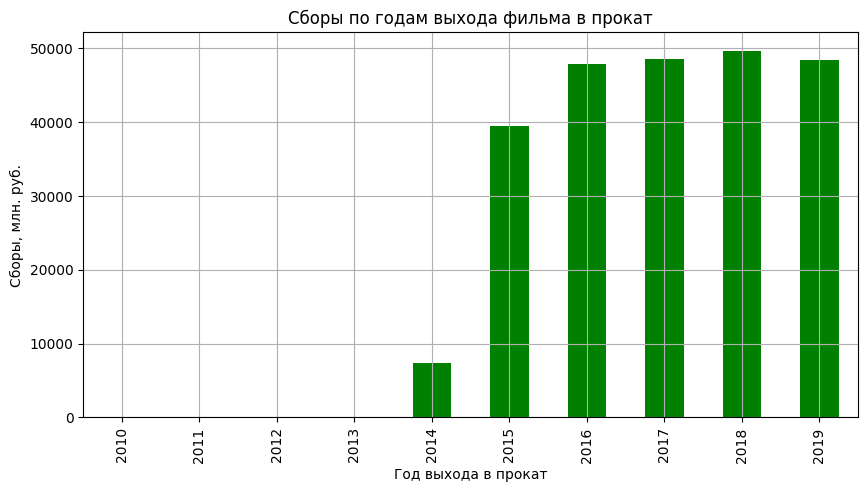

In [33]:
(df.groupby('year')['box_office'].sum()/10**6).plot(kind='bar',
                                                    color='g',
                                                    figsize=(10,5),
                                                    grid=True)
plt.xlabel('Год выхода в прокат')
plt.ylabel('Сборы, млн. руб.')
plt.title('Сборы по годам выхода фильма в прокат')
plt.show()

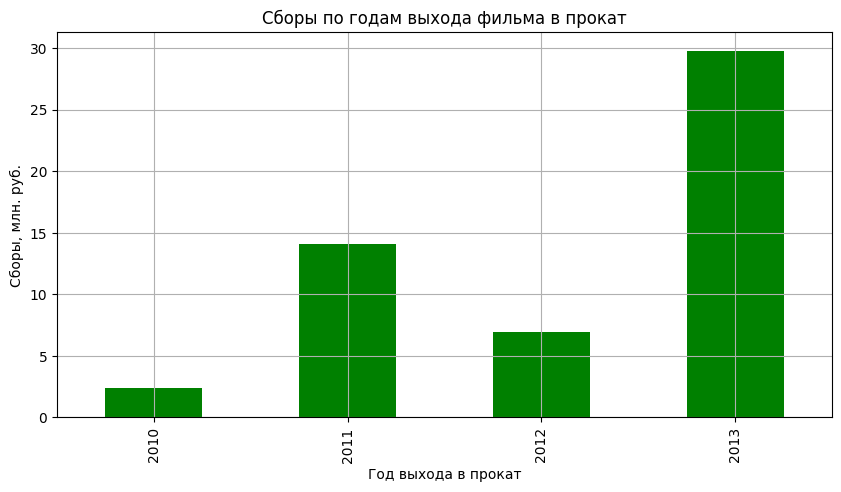

In [34]:
d4 = df.loc[df['year']<2014].groupby('year')['box_office'].sum()
d4 = d4/10**6
d4.plot(kind='bar',
        color='g',
        figsize=(10,5),
        grid=True)
plt.xlabel('Год выхода в прокат')
plt.ylabel('Сборы, млн. руб.')
plt.title('Сборы по годам выхода фильма в прокат')
plt.show()

В 2010 году сумма сбора была минимальна и составляла около 2.5 млн. рублей, в 2018 году сумма сборов была максимально и составила почти 50 млрд. рублей.

**3.3. С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. Сравните значения и сделайте выводы.**

In [35]:
df.loc[df['box_office']!=0].pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year,,
2010,2.404608e+04,1710.000
2011,1.293832e+05,3000.000
2012,5.654815e+04,6220.000
2013,1.664788e+05,3580.000
2014,2.727089e+07,20400.000
2015,8.549213e+07,5003450.150
2016,9.117390e+07,3915041.020
2017,1.360328e+08,9968340.000


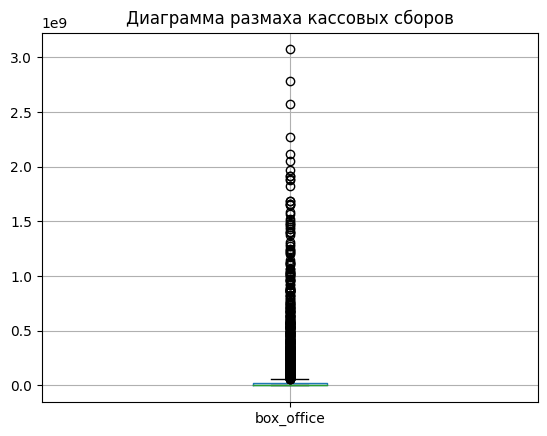

In [36]:
df.loc[df['box_office']!=0].boxplot('box_office')
plt.title('Диаграмма размаха кассовых сборов')
plt.show()

Медиана на порядок меньше среднего значения. Это говорит о том, что в наборе данных собраны фильмы довольно разного масштаба и блокбастеры с большой кассой и малобюджетные фильмы. Диаграмма размаха кассовых сборов это подтверждает.

**3.4 Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.**

In [37]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [38]:
def age(s):
  end = s.find('+')
  s = s[1:end]
  return int(s)

for category in  df['age_restriction'].unique():
  print(age(category), end=' ')

df['age'] = df['age_restriction'].apply(age)

18 6 12 16 0 

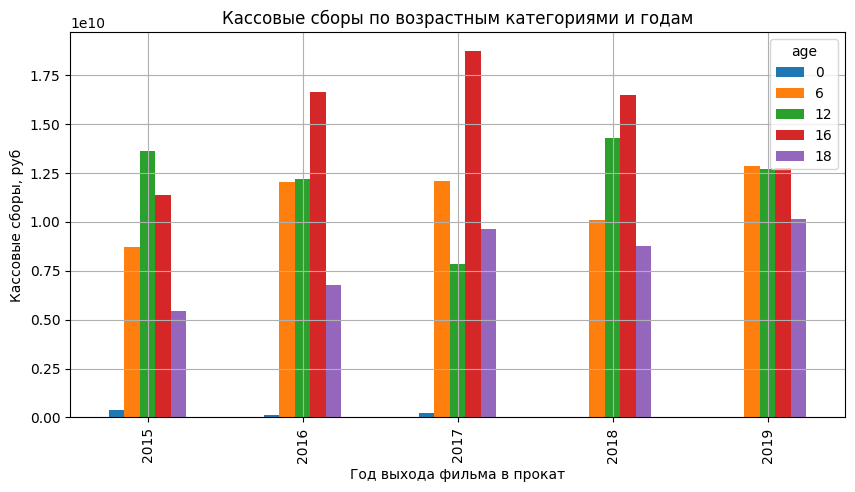

In [39]:
df.loc[df['year']>=2015].pivot_table(index='year',
                                     columns='age',
                                     values='box_office',
                                     aggfunc='sum').plot(kind='bar',
                                                         grid=True,
                                                         figsize=(10,5))
plt.xlabel('Год выхода фильма в прокат')
plt.ylabel('Кассовые сборы, руб')
plt.title('Кассовые сборы по возрастным категориями и годам')
plt.show()

Возрастное ограничение влияет на сборы фильма. Самой прибыльной категорией является категория "16+", только в 2015 году ее по сборам опередила только категория "12+". Фильмы в категори "0+" являются аутсайдерами по кассовым сборам по сравнению с остальными.
<br> Для категорий "6+", "16+" и "18+" наблюдается тренд на увеличение кассовых сборов с 2015 по 2017 года и спад в 2018-2019гг.
<br> Для категории "12+" наблюдается обратная тендеция по сравнению с остальными категория - спад в период 2015-2017гг. и рост в 2018-2019гг.



##**Шаг 4. Исследуйте фильмы, которые получили государственную поддержку**
**На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.**

**Проанализируем сколько государство выделяло средств на поддержку кино каждый год.**

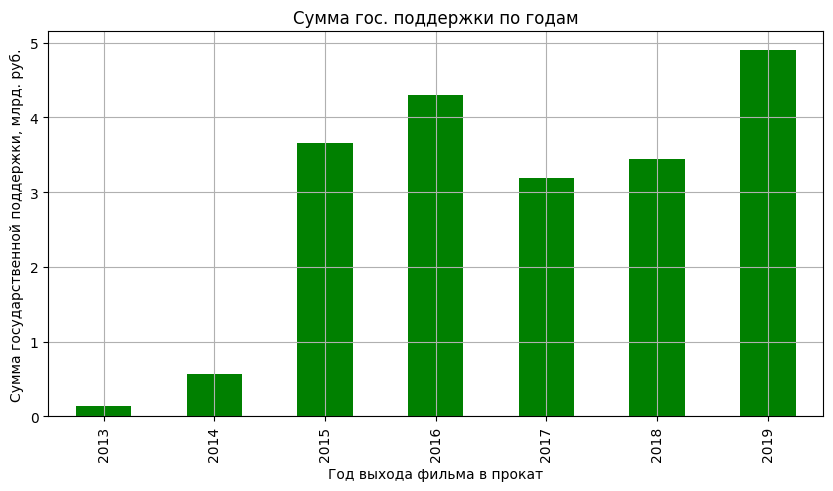

In [40]:
df_1 = df.loc[df['financing_source']!=0]
df_1['total_support'] = (df_1['refundable_support'] + df_1['nonrefundable_support'])/10**9

df_1.groupby('year')['total_support'].sum().plot(kind='bar',
                                                 color='g',
                                                 figsize=(10,5),
                                                 grid=True)
plt.xlabel('Год выхода фильма в прокат')
plt.ylabel('Сумма государственной поддержки, млрд. руб.')
plt.title('Сумма гос. поддержки по годам')
plt.show()

Видно что с каждым годом уровень гос. поддержки растет. Начиная с 2015 года поддержка возрасла кратно. В 2017-2018гг. был небольшой спад поддержки по сравнению с 2015-2016гг.

**Проанализируем на сколько прибыльными являются фильмы с гос. поддержкой**

In [41]:
df_1['benefit'] = (df_1['box_office'] - df_1['budget'])>0
df_1['not_benefit'] = (df_1['box_office'] - df_1['budget'])<0

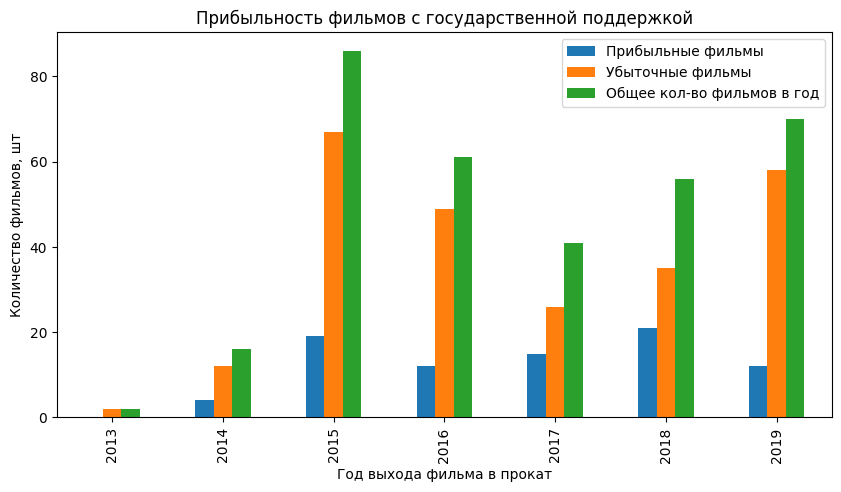

In [42]:
benefit = df_1.groupby('year').agg({'benefit':'sum',
                                    'not_benefit':'sum',
                                    'title':'count'})
benefit.columns = ['Прибыльные фильмы', 'Убыточные фильмы', 'Общее кол-во фильмов в год']
benefit.plot(kind='bar',
             figsize=(10,5))
plt.xlabel('Год выхода фильма в прокат')
plt.ylabel('Количество фильмов, шт')
plt.title('Прибыльность фильмов с государственной поддержкой')
plt.show()

В целом количество убыточных фильмов в каждом году всегда стабильно больше количества прибыльных фильмов с государственной поддержкой. Можно выделить 2017 и 2018гг. где доля прибыльных фильмов была максимальная за весь период наблюдений.

**Проанализируем средние оценки фильмов с гос. поддержкой и без неё.**

In [43]:
ratings_support = df_1.loc[df_1['ratings']!=0].groupby('year')['ratings'].mean()
ratings_support

,ratings
year,
2013,6.700000
2014,6.006667
2015,6.139759
2016,5.677193
2017,6.000000
2018,6.001887
2019,6.176119


In [44]:
ratings_no_support = df.loc[(df['financing_source']==0) &
       (df['year']>=2013) &
       (df['ratings']!=0)].groupby('year')['ratings'].mean()
ratings_no_support

,ratings
year,
2013,6.513081
2014,6.531586
2015,6.357778
2016,6.424127
2017,6.344836
2018,6.429043
2019,6.538333


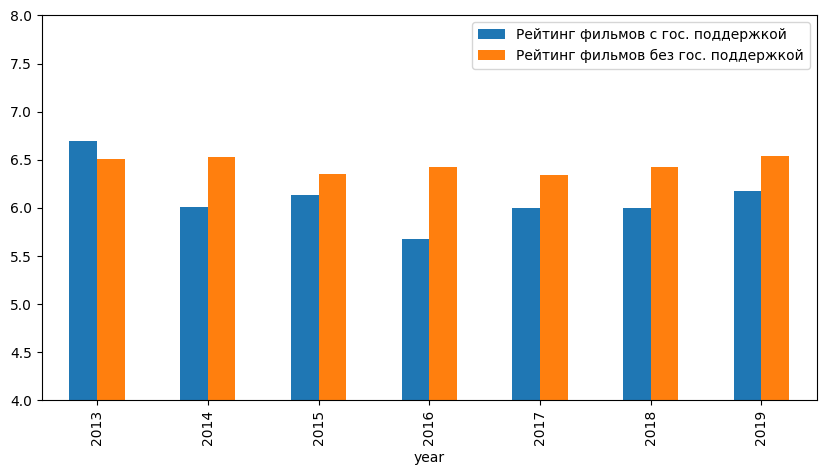

In [45]:
rating = pd.DataFrame(data={'Рейтинг фильмов с гос. поддержкой':ratings_support,
                            'Рейтинг фильмов без гос. поддержкой':ratings_no_support})
rating.plot(kind='bar', figsize=(10,5))
plt.ylim(4,8)
plt.show()

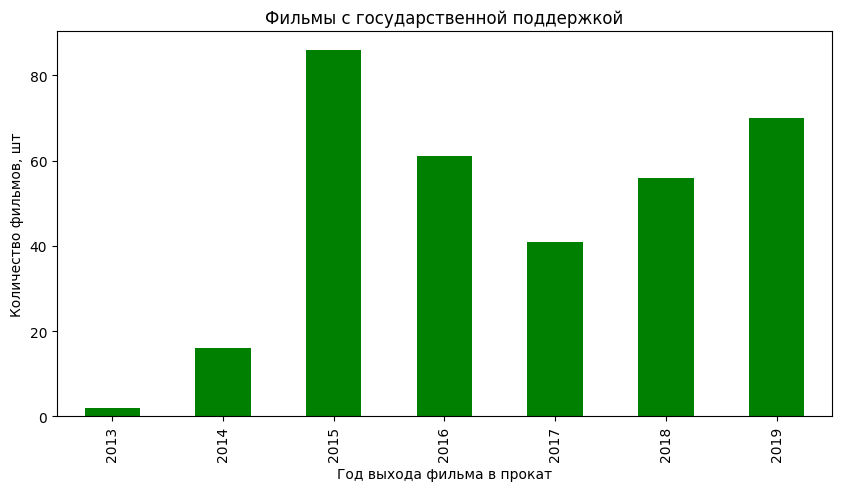

In [46]:
df_1.groupby('year')['title'].count().plot(kind='bar',
                                           color='g',
                                           figsize=(10,5))
plt.xlabel('Год выхода фильма в прокат')
plt.ylabel('Количество фильмов, шт')
plt.title('Фильмы с государственной поддержкой')
plt.show()

Фильмы с государственной поддержкой стабильно имеют среднюю оценку ниже по сравнению с фильмами без поддержки. Выделяется только 2013 год, но там было снято только 2 фильма, по котором не стоит делать выводы по средней оценке.
Можно предположить, что зрителю фильмы с гос. поддержкой менее интересны.

##**Шаг 5. Напишите общий вывод**

 -  **с 2010 по 2014 года доля фильмов выходящих в прокат в России росла линейно с уровня 0.1 до 0.33. В 2015 году произошел резкий скачек, и эта доля резко увеличилась в 2 раза. Период с 2015 по 2019 года представлен более полно по информации по кассовыми сборам.**

 - **в 2010 году сумма сбора была минимальна и составляла около 2.5 млн. рублей, в 2018 году сумма сборов была максимально и составила почти 50 млрд. рублей.**

 - **в наборе данных собраны фильмы довольно разного масштаба и блокбастеры с большой кассой и малобюджетные фильмы. Диаграмма размаха кассовых сборов это подтверждает.**

 - **возрастное ограничение влияет на сборы фильма. Самой прибыльной категорией является категория "16+", только в 2015 году ее по сборам опередила только категория "12+". Фильмы в категори "0+" являются аутсайдерами по кассовым сборам по сравнению с остальными.**

  -  **для категорий "6+", "16+" и "18+" наблюдается тренд на увеличение кассовых сборов с 2015 по 2017 года и спад в 2018-2019гг.**
  - **для категории "12+" наблюдается обратная тендеция по сравнению с остальными категория - спад в период 2015-2017гг. и рост в 2018-2019гг.**

 - **с каждым годом уровень гос. поддержки растет. Начиная с 2015 года поддержка возрасла кратно. В 2017-2018гг. был небольшой спад поддержки по сравнению с 2015-2016гг.**

 - **в целом количество убыточных фильмов в каждом году всегда стабильно больше количества прибыльных фильмов с государственной поддержкой. Можно выделить 2017 и 2018гг. где доля прибыльных фильмов была максимальная за весь период наблюдений.**

 - **фильмы с государственной поддержкой стабильно имеют среднюю оценку ниже по сравнению с фильмами без поддержки. Выделяется только 2013 год, но там было снято только 2 фильма, по котором не стоит делать выводы по средней оценке.
Можно предположить, что зрителю фильмы с гос. поддержкой менее интересны.**